In [1]:
import pandas as pd
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
train_file = "../data/smsspamcollection/SMSSpamCollection.txt"

df_train = pd.read_csv(train_file, sep="\t", header=None, names=["label", "text"])
l_train = len(df_train)
print("Length of training data: %d"%(l_train))


Length of training data: 5572


In [3]:
df_train.head(10)

label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
5  spam  FreeMsg Hey there darling it's been 3 week's n...
6   ham  Even my brother is not like to speak with me. ...
7   ham  As per your request 'Melle Melle (Oru Minnamin...
8  spam  WINNER!! As a valued network customer you have...
9  spam  Had your mobile 11 months or more? U R entitle...

In [4]:
df_train.text = df_train.text.str.lower()
df_train.label = df_train.label.str.lower()

In [5]:
df_train.head(10)

label                                               text
0   ham  go until jurong point, crazy.. available only ...
1   ham                      ok lar... joking wif u oni...
2  spam  free entry in 2 a wkly comp to win fa cup fina...
3   ham  u dun say so early hor... u c already then say...
4   ham  nah i don't think he goes to usf, he lives aro...
5  spam  freemsg hey there darling it's been 3 week's n...
6   ham  even my brother is not like to speak with me. ...
7   ham  as per your request 'melle melle (oru minnamin...
8  spam  winner!! as a valued network customer you have...
9  spam  had your mobile 11 months or more? u r entitle...

In [6]:
null_check = df_train.isna().sum()
print("Null check on training data:")
print(null_check)


Null check on training data:
label    0
text     0
dtype: int64


In [7]:
print("Original data:")
df_train.head(5)

Original data:


label                                               text
0   ham  go until jurong point, crazy.. available only ...
1   ham                      ok lar... joking wif u oni...
2  spam  free entry in 2 a wkly comp to win fa cup fina...
3   ham  u dun say so early hor... u c already then say...
4   ham  nah i don't think he goes to usf, he lives aro...

In [8]:
df_train.fillna(-1, inplace=True)
print("New data (after filling NaN by -1):")
df_train.head(5)

New data (after filling NaN by -1):


label                                               text
0   ham  go until jurong point, crazy.. available only ...
1   ham                      ok lar... joking wif u oni...
2  spam  free entry in 2 a wkly comp to win fa cup fina...
3   ham  u dun say so early hor... u c already then say...
4   ham  nah i don't think he goes to usf, he lives aro...

In [9]:
print("Label distribution of training data:")
print((df_train.label.value_counts()/l_train))

Label distribution of training data:
ham     0.865937
spam    0.134063
Name: label, dtype: float64


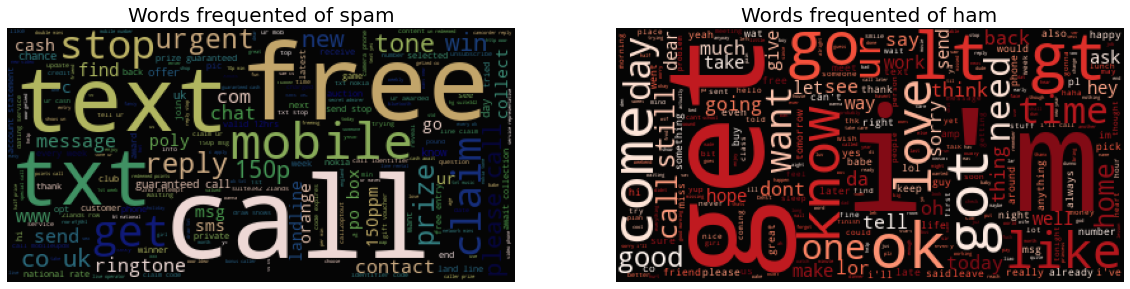

In [10]:
%matplotlib inline

dataset = df_train
eng_stopwords = set(stopwords.words("english"))

plt.figure(figsize=(20,20))
plt.subplot(121)
sub_text=dataset[dataset.label=="spam"].text.values
subwc= WordCloud(background_color="black",max_words=2000,stopwords=eng_stopwords)
subwc.generate(" ".join(sub_text))
plt.axis("off")
plt.title("Words frequented of spam", fontsize=20)
plt.imshow(subwc.recolor(colormap= 'gist_earth' , random_state=244), alpha=0.98)

plt.subplot(122)
non_text=dataset[dataset.label=="ham"].text.values
nonwc= WordCloud(background_color="black",max_words=2000,stopwords=eng_stopwords)
nonwc.generate(" ".join(non_text))
plt.axis("off")
plt.title("Words frequented of ham", fontsize=20)
plt.imshow(nonwc.recolor(colormap= 'Reds' , random_state=244), alpha=0.98)

In [11]:
from collections import Counter
c_sub = Counter()
for sent in sub_text:
    c_sub.update(sent.split())
    
c_non = Counter()
for sent in non_text:
    c_non.update(sent.split())


In [12]:
inter_words = set(c_non).intersection(set(c_sub))
inter_words.difference_update(eng_stopwords)
print("Common words use in both: %d"%(len(inter_words)))
inter_words

Common words use in both: 1016


{'bedroom',
 'ready!',
 'smashed',
 'me?',
 'four',
 'wat',
 'off!',
 'pic',
 'ok',
 'sending',
 'account',
 'time',
 'price',
 'thanks',
 'paying',
 'every',
 'please',
 'in.',
 'mystery',
 'you!',
 'five',
 'spanish',
 'flight',
 'us',
 'dirty',
 'it!',
 'days',
 'week.',
 'things',
 'again,',
 'totally',
 'game.',
 'member',
 'services',
 'babe',
 'u?',
 'for.',
 'anytime',
 'fun',
 '11',
 'joined',
 'slow',
 'gr8',
 'definitely',
 'along',
 'log',
 'yes.',
 'you,',
 'maybe',
 'eve?',
 'wedding',
 'normal',
 'ages',
 'texts',
 'sms',
 'messages.',
 'hardcore',
 'unable',
 'c',
 'listening',
 'order',
 ')',
 'released',
 'hot',
 'subs',
 'm8?',
 '20',
 'still?',
 'package',
 'games!',
 'lets',
 'access',
 '2morow',
 'hide',
 'worlds',
 'b',
 'office',
 'holiday',
 'xmas',
 'missing',
 'sorry',
 'video',
 'day,',
 'bored',
 'on.',
 'final',
 'reminder',
 'tomorrow?',
 '6.',
 'boys',
 'lookin',
 'sorry,',
 'june',
 'reach',
 'im',
 'texting',
 'current',
 'brought',
 'credit!',
 'recei

In [13]:
sus_wd = []
for wd in inter_words:
    if c_sub[wd] >= c_non[wd]*3:
        sus_wd.append(wd)
sus_wd

['price',
 'services',
 'anytime',
 'subs',
 'holiday',
 'video',
 'final',
 'direct',
 "u've",
 'award',
 '1000s',
 'apply',
 'sony',
 'original',
 'club',
 'brand',
 'sam',
 'currently',
 'information',
 '&',
 'update',
 'collect',
 'voucher',
 'followed',
 'reply',
 'music',
 'friend.',
 'summer',
 'double',
 'truly',
 'sex',
 'contact',
 'now!',
 'tried',
 'review',
 'tc',
 'pounds',
 'gift',
 'sport',
 'receive',
 'uk',
 'await',
 'enter',
 'worth',
 'adult',
 'sms.',
 'arrive',
 'phones',
 'week!',
 'customer',
 'contract',
 'congratulations',
 'numbers',
 'official',
 'orange',
 'network',
 'mobile',
 'app',
 'stop',
 'local',
 'ordered',
 'info',
 'live.',
 'landline',
 'questions.',
 'luck!',
 'goto',
 'link',
 'txt',
 'today!',
 'wk.',
 'nokia',
 'guys.',
 'welcome.',
 'del',
 'draw',
 's.',
 'store',
 'chat',
 'calls.',
 'colour',
 'shows',
 'line',
 'biggest',
 'box',
 'replying',
 'discount',
 'charge.',
 'urgent',
 'unlimited',
 'camera',
 'win',
 'cost',
 'po',
 'player'

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
traindev = df_train[["text","label"]].sample(frac=1,random_state=1).reset_index(drop=True)
#train, dev, test = np.split(traindev, [int(.6*len(df)), int(.8*len(df))])
train, dev = train_test_split(traindev, test_size=0.3)
train = train.reset_index(drop=True)
dev = dev.reset_index(drop=True)

In [15]:
train.to_csv("../data/smsspamcollection/train.csv", index=False)
dev.to_csv("../data/smsspamcollection/test.csv", index=False)

In [16]:
dev.head(10)

text label
0  do you want 750 anytime any network mins 150 t...  spam
1  dear voucher holder have your next meal on us....  spam
2  lol i know! they're so dramatic. schools alrea...   ham
3  well welp is sort of a semiobscure internet thing   ham
4  okey doke. i'm at home, but not dressed cos la...   ham
5    no de.am seeing in online shop so that i asked.   ham
6  free entry to the gr8prizes wkly comp 4 a chan...  spam
7          i am 6 ft. we will be a good combination!   ham
8  designation is software developer and may be s...   ham
9  had your mobile 11mths ? update for free to or...  spam

In [17]:
def pieplt(data):
    print("Print len of data: %d"%len(data))
    labels = data["label"].value_counts()
    plt.figure(figsize=(10,10))
    labels.plot.pie(autopct='%.2f')

Print len of data: 3900


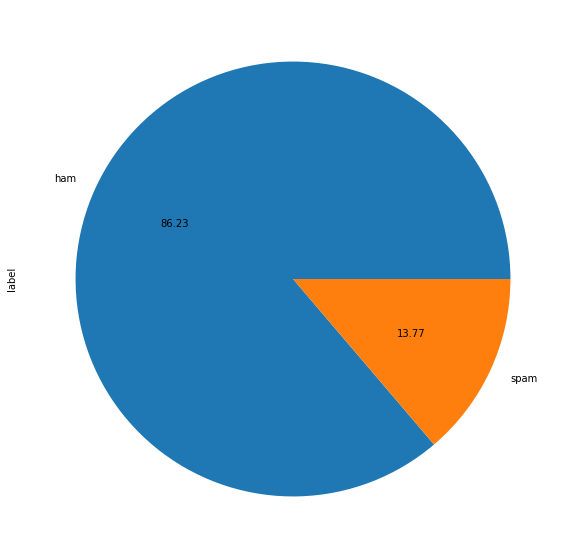

In [18]:
pieplt(train)

Print len of data: 1672


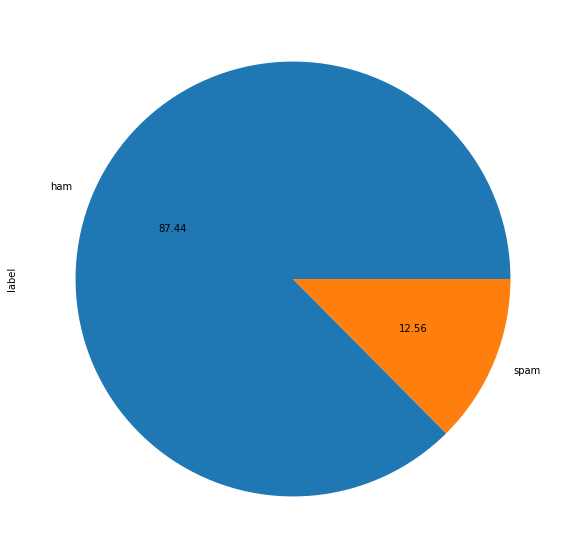

In [19]:
pieplt(dev)